In [97]:
# import library 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
#from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor

from scipy.stats import randint, uniform
from sklearn.inspection import permutation_importance

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error


# EDA

### Import and Check Dataset

In [2]:
# import dataset
por = pd.read_csv('dataset/dataset/student-por.csv')

In [3]:
por.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

Dove: 
<ul>
<li><b>school</b>:  student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)</li>
<li><b>sex</b>: student's sex (binary: 'F' - female or 'M' - male)</li>
<li><b>age</b>: student's age (numeric: from 15 to 22)</li>
<li><b>address</b>: student's home address type (binary: 'U' - urban or 'R' - rural)</li>
<li><b>famsize</b>: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</li>
<li><b>Pstatus</b>: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</li>
<li><b>Medu</b>: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Fedu</b>: Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Mjob</b>: Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>Fjob</b>: Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>reason</b>: reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</li>
<li><b>guardian</b>: guardian - student's guardian (nominal: 'mother', 'father' or 'other')</li>
<li><b>traveltime</b>: traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>
<li><b>studytime</b>: studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)</li>
<li><b>failures</b>: number of past class failures (numeric: n if 1<=n<3, else 4)</li>
<li><b>schoolsup</b>: extra educational support (binary: yes or no)</li>
<li><b>famsup</b>: family educational support (binary: yes or no)</li>
<li><b>paid</b>: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>
<li><b>activities</b>: extra-curricular activities (binary: yes or no)</li>
<li><b>nursery</b>: attended nursery school (binary: yes or no)</li>
<li><b>higher</b>: wants to take higher education (binary: yes or no)</li>
<li><b>internet</b>: Internet access at home (binary: yes or no)</li>
<li><b>romantic</b>: with a romantic relationship (binary: yes or no)</li>
<li><b>famrel</b>: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>
<li><b>freetime</b>: free time after school (numeric: from 1 - very low to 5 - very high)</li>
<li><b>goout</b>: going out with friends (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Dalc</b>: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Walc</b>: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>health</b>: current health status (numeric: from 1 - very bad to 5 - very good)</li>
<li><b>absences</b>: number of school absences (numeric: from 0 to 93)</li>

<li><b>G1</b>: first period grade (numeric: from 0 to 20)</li>
<li><b>G2</b>: second period grade (numeric: from 0 to 20)</li>
<li><b>G3</b>: final grade (numeric: from 0 to 20, output target)</li>

</ul>

In [4]:
por.shape

(649, 33)

In [ ]:
len(por[por.duplicated()])

In [ ]:
por.info()

In [ ]:
por.head()

### Encoding categorical variables

In [5]:
por_enc = por.copy()

In [6]:
label_encoders = {}
onehot_encoders = {}
mapping = {}  # LabelEncoder mapping dictionary

In [7]:
categorical_columns = por_enc.select_dtypes(exclude=['number']).columns

categorical_binary_columns = []
categorical_not_binary_columns = []


for col in categorical_columns:
        if por_enc.nunique()[col] == 2:
                categorical_binary_columns.append(col)
        else:
               categorical_not_binary_columns.append(col)

In [8]:
# Encoding non-binary variables with OneHotEncoder and updating the mapping
for col in categorical_not_binary_columns:
    onehot_encoders[col] = OneHotEncoder(categories='auto', drop='if_binary')
    encoded_values = onehot_encoders[col].fit_transform(por_enc[[col]])
    encoded_df = pd.DataFrame(encoded_values.toarray(), columns=onehot_encoders[col].get_feature_names_out([col]))
    por_enc = pd.concat([por_enc, encoded_df], axis=1)
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(onehot_encoders[col].categories_[0])}

    por_enc.drop(columns=[col], inplace=True)

In [9]:
# Encoding binary variables with LabelEncoder and updating the mapping
for col in categorical_binary_columns:
    label_encoders[col] = LabelEncoder()
    por_enc[col] = label_encoders[col].fit_transform(por_enc[col])
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(label_encoders[col].classes_)}

### G3 - Correlation

Di seguito viene mostrata la correlazione del voto finale ('G3') con le altre variabile

In [12]:
# Calcolare la matrice di correlazione
correlation_matrix = por_enc.corr()
g3_correlations_abs = correlation_matrix['G3'].abs().sort_values(ascending=False)


In [13]:
g3_correlations_abs

G3                   1.000000
G2                   0.918548
G1                   0.826387
failures             0.393316
higher               0.332172
school               0.284294
studytime            0.249789
Medu                 0.240151
Fedu                 0.211800
Dalc                 0.204719
Walc                 0.176619
reason_reputation    0.170944
address              0.167637
internet             0.150025
Mjob_at_home         0.136778
Mjob_teacher         0.134910
reason_other         0.132577
sex                  0.129077
traveltime           0.127173
Fjob_teacher         0.125916
freetime             0.122705
age                  0.106505
Mjob_health          0.101244
health               0.098851
reason_course        0.098305
absences             0.091379
romantic             0.090583
goout                0.087641
guardian_other       0.080729
schoolsup            0.066405
famrel               0.063361
activities           0.059791
Mjob_other           0.059251
famsup    

Data l'alta correlazione con le variabili G2 e G3, che sono comunque logicamente correlate a G3, è stato deciso di rimuoverle onve evitare problematiche di <b>overfitting</b> e <b>multicollinearità</b>.

Il dataset originale, contenente le feature G2 e G3, verrà comunque lanciato, per dimostrare le peggiori performance in fase di valutazione dei modelli predittivi in loro presenza.

In [14]:
por_enc_bck = por_enc.copy()
por_enc = por_enc.drop(['G1', 'G2'], axis=1)

In [17]:
correlation_matrix = por_enc.corr()
g3_correlations_abs = correlation_matrix['G3'].abs().sort_values(ascending=False)

In [18]:
g3_correlations_abs[g3_correlations_abs >= 0.1]

G3                   1.000000
failures             0.393316
higher               0.332172
school               0.284294
studytime            0.249789
Medu                 0.240151
Fedu                 0.211800
Dalc                 0.204719
Walc                 0.176619
reason_reputation    0.170944
address              0.167637
internet             0.150025
Mjob_at_home         0.136778
Mjob_teacher         0.134910
reason_other         0.132577
sex                  0.129077
traveltime           0.127173
Fjob_teacher         0.125916
freetime             0.122705
age                  0.106505
Mjob_health          0.101244
Name: G3, dtype: float64

In [57]:
type(g3_correlations_abs[g3_correlations_abs >= 0.1].index.to_list())

list

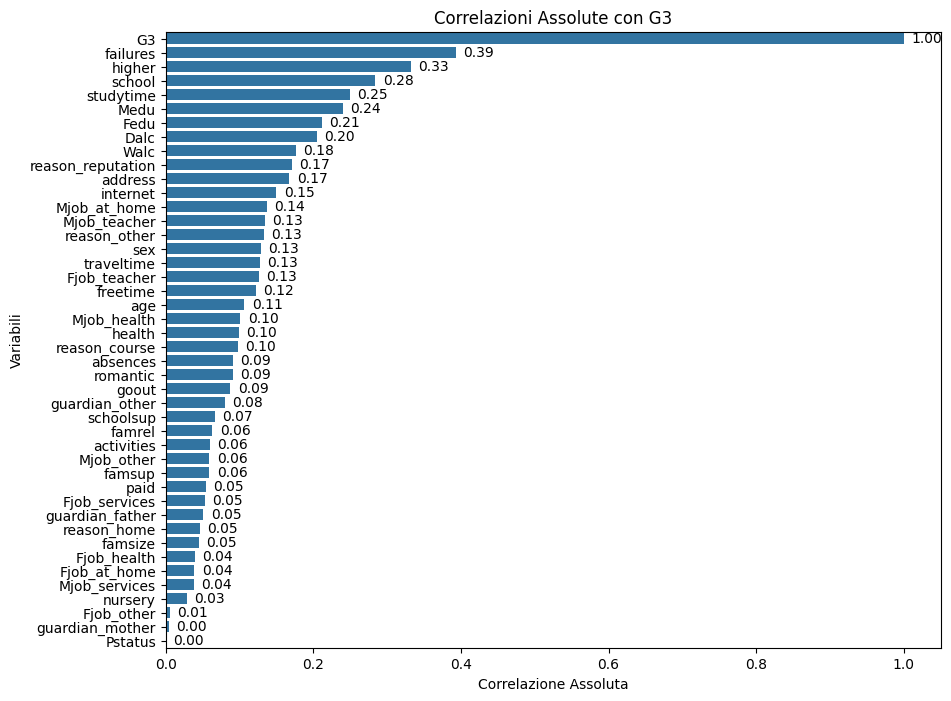

In [19]:
# Creare un istogramma a barre orizzontali delle correlazioni con 'G3' basato sul valore assoluto utilizzando Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=g3_correlations_abs.values, y=g3_correlations_abs.index, orient='h')
plt.title('Correlazioni Assolute con G3')
plt.xlabel('Correlazione Assoluta')
plt.ylabel('Variabili')

# Aggiungi le annotazioni di valore utilizzando Matplotlib
for i, v in enumerate(g3_correlations_abs):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=10)

plt.show()

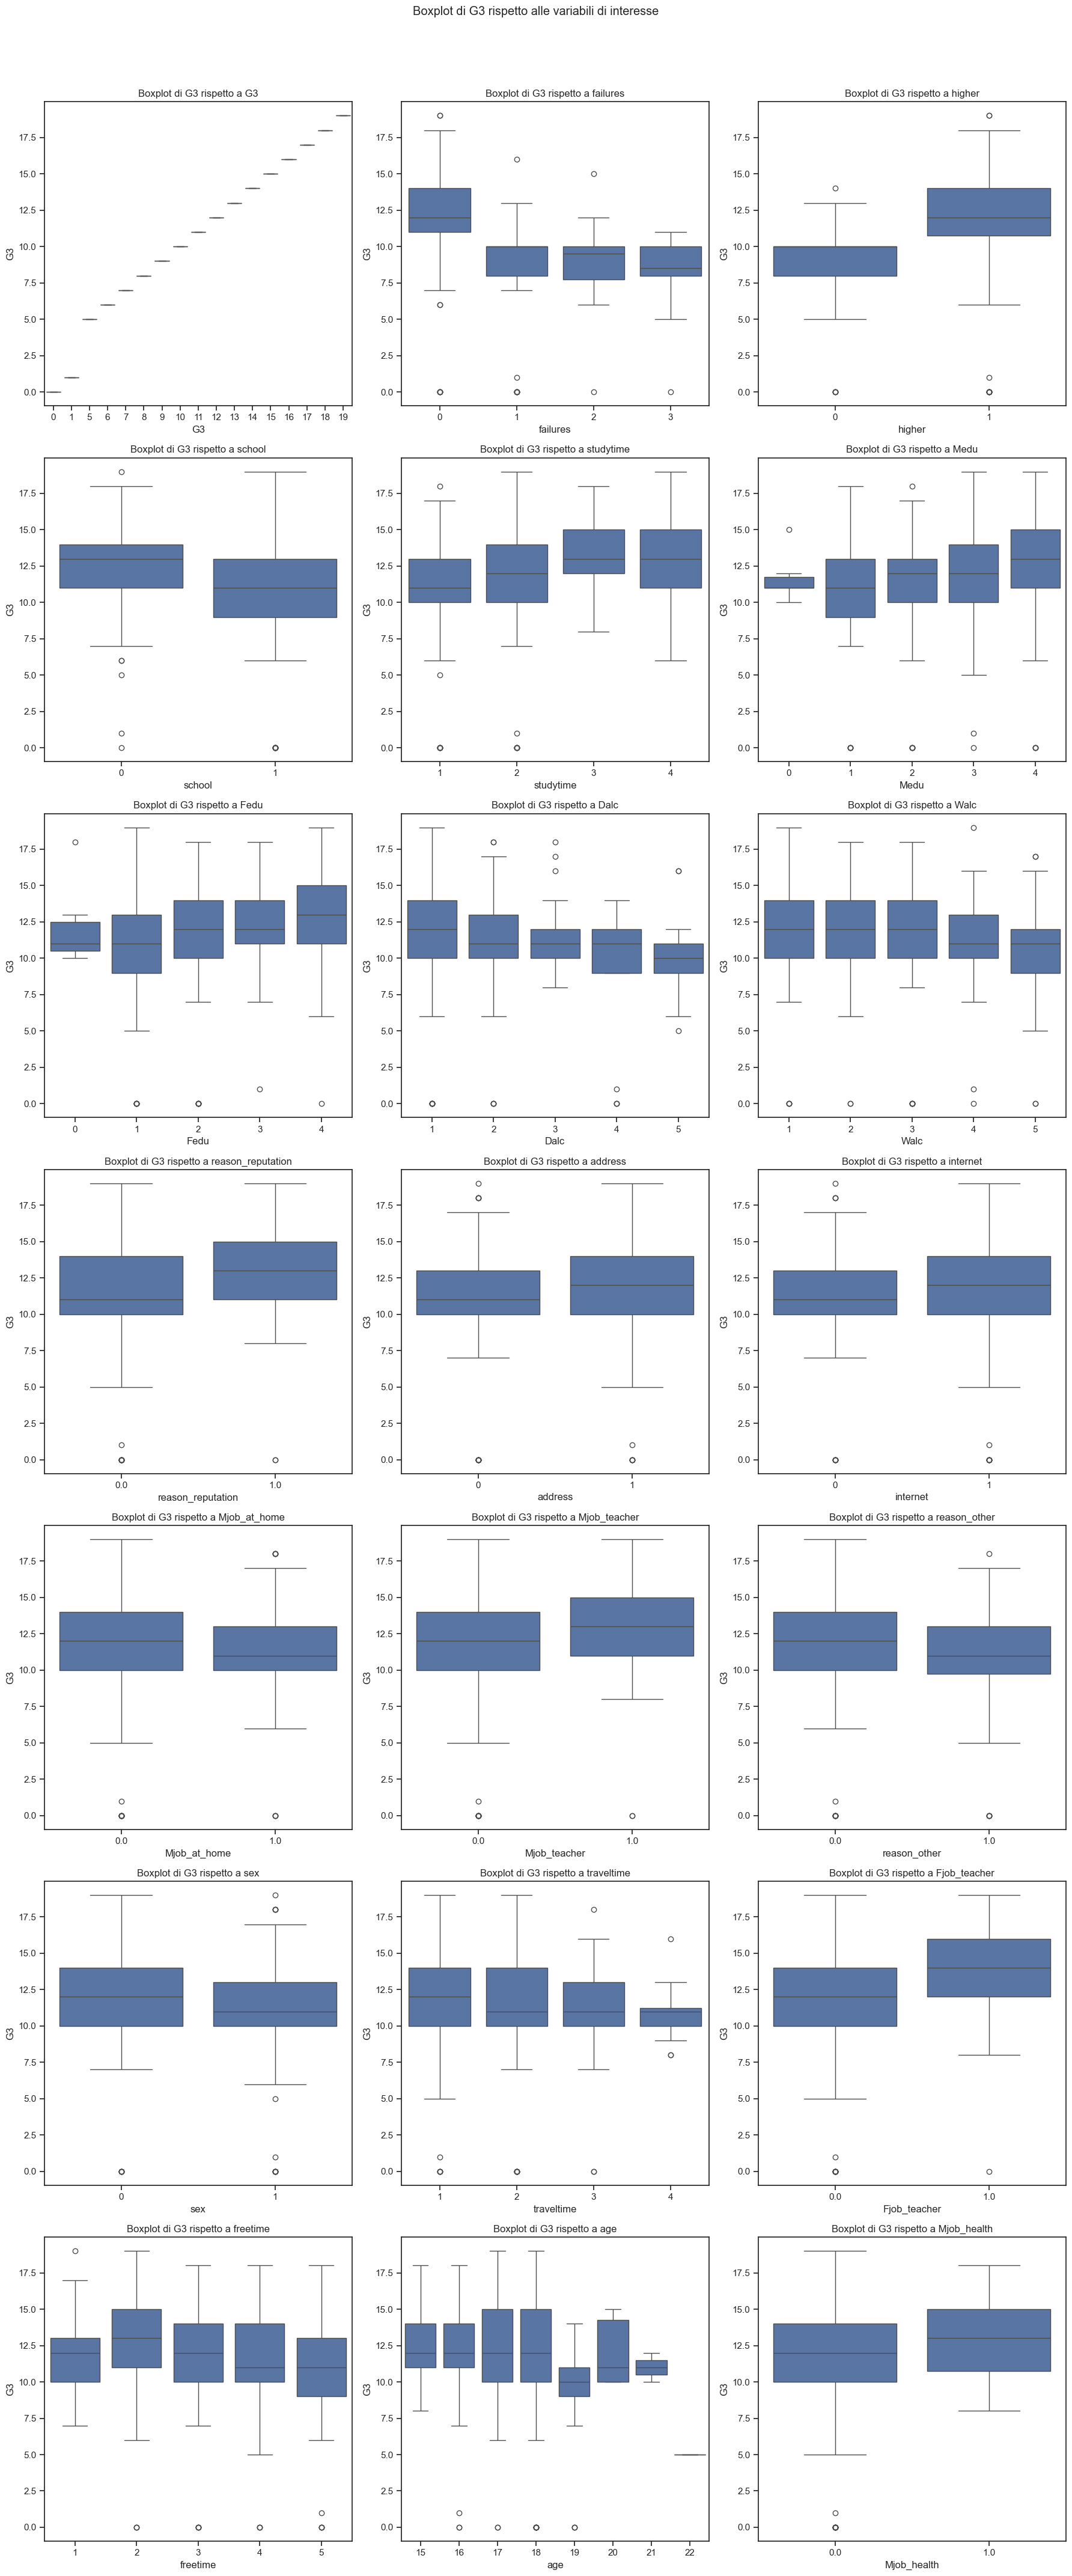

In [60]:


# Supponiamo che il tuo dataframe si chiami por_enc e contenga le colonne di interesse inclusa 'G3'
# por_enc = pd.read_csv('path_to_your_dataset.csv')

# Lista delle variabili per le quali vuoi creare i boxplot rispetto a G3
variables_of_interest = g3_correlations_abs[g3_correlations_abs >= 0.1].index.tolist()

# Imposta lo stile di Seaborn
sns.set_theme(style="ticks")

# Calcola il numero totale di subplot necessari
num_plots = len(variables_of_interest)
num_rows = (num_plots - 1) // 3 + 1  # Calcola il numero di righe necessarie

# Crea una figura con subplot organizzati in una griglia 3x(num_rows)
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 6))

# Flattening degli assi nel caso ci siano meno di 3 colonne
axes = axes.flatten()

# Ciclo per generare i boxplot per ciascuna variabile di interesse rispetto a G3
for i, var in enumerate(variables_of_interest):
    ax = axes[i]
    sns.boxplot(x=var, y='G3', data=por_enc, ax=ax)
    ax.set_title(f'Boxplot di G3 rispetto a {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('G3')

# Rimuovi eventuali assi non utilizzati se il numero di variabili non è multiplo di 3
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Aggiungi titolo generale sopra la figura
plt.suptitle('Boxplot di G3 rispetto alle variabili di interesse', y=1.02)
plt.tight_layout()
plt.show()


### <b>Score Analysis</b>

In [23]:
# media dei voti in generale

# media dei voti per i ripetenti 

# media dei voti per chi vuole prendere titoli di studio più elevati

In [22]:
print("Media generale: ", round(por.G3.mean(), 2))

Media generale:  11.91


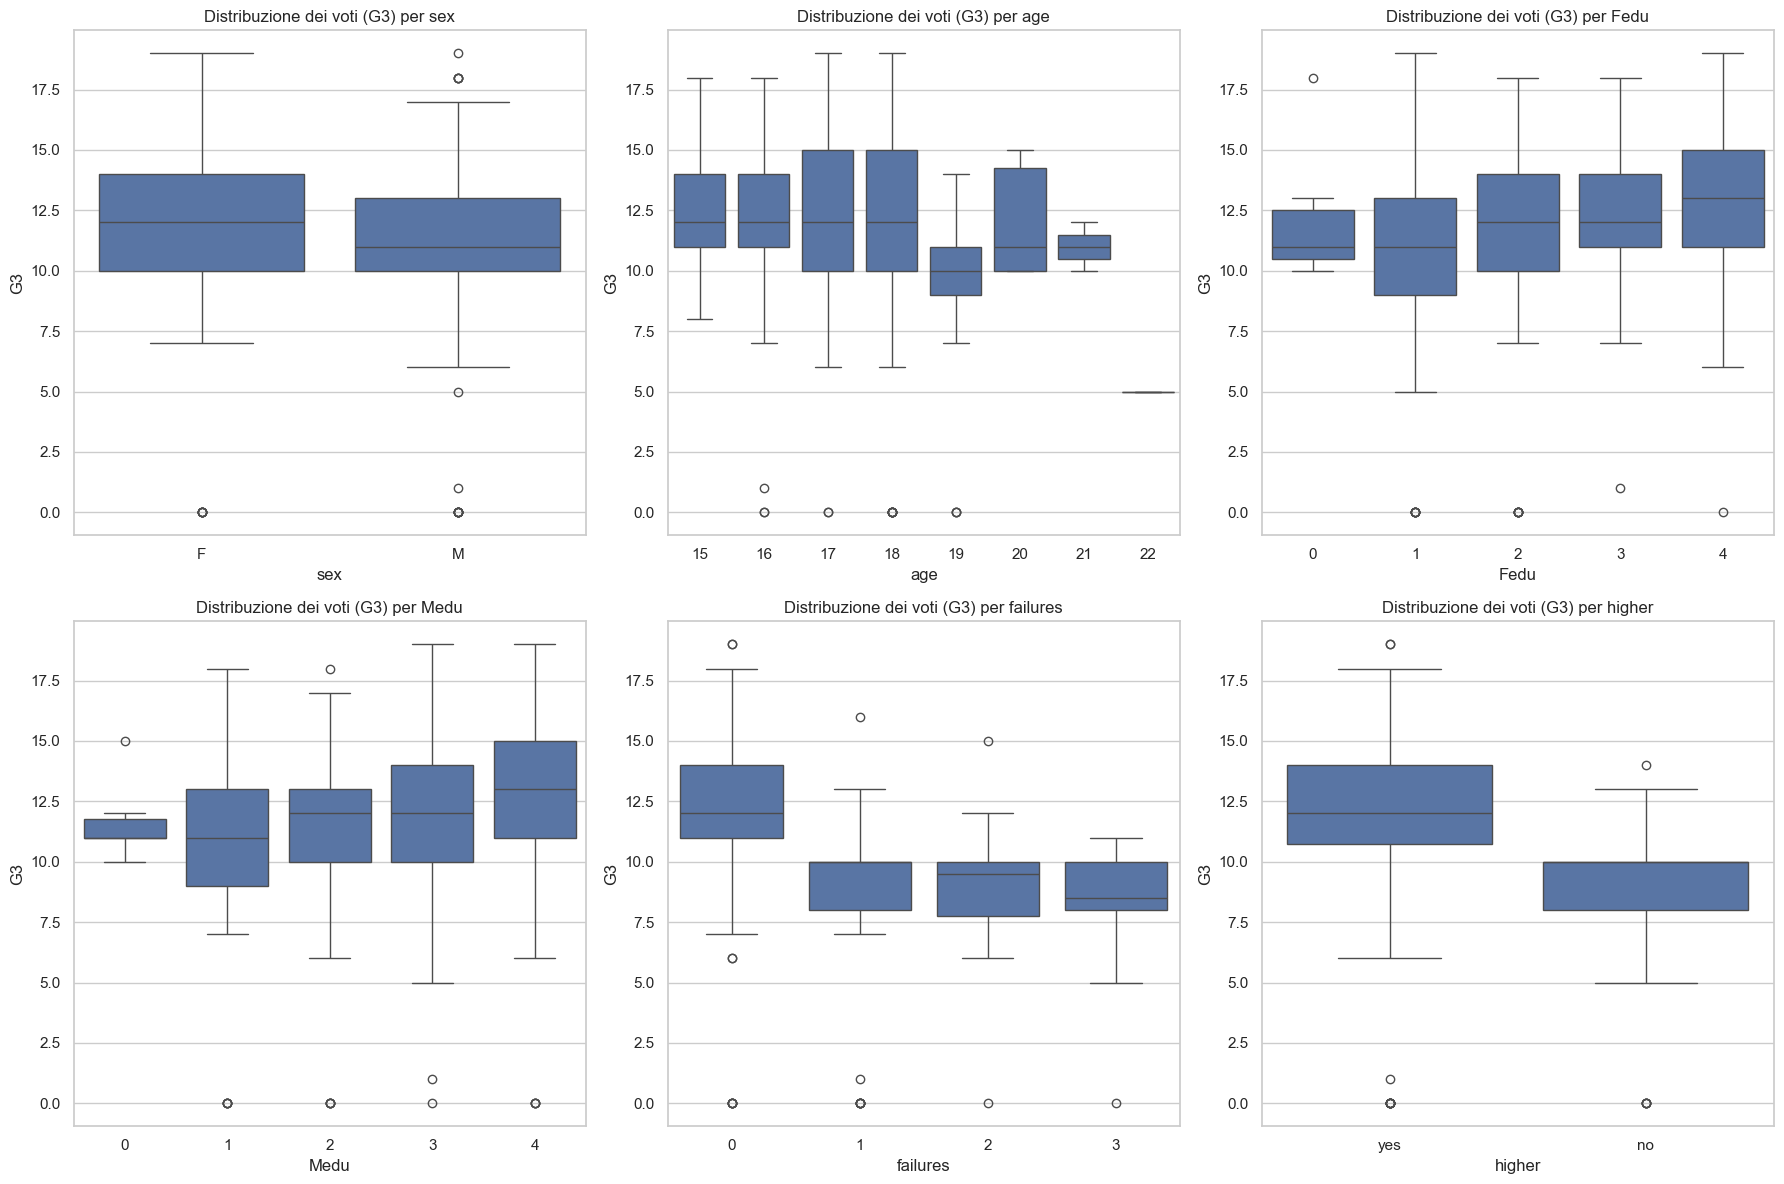

In [47]:

# Definisci le colonne categoriali per le quali vuoi creare i boxplot
categorical_columns = ['sex', 'age', 'Fedu', 'Medu', 'failures', 'higher']  # Aggiungi altre colonne se necessario

# Imposta lo stile di Seaborn
sns.set_theme(style="whitegrid")

# Calcola il numero totale di subplot necessari
num_plots = len(categorical_columns)
num_rows = (num_plots - 1) // 3 + 1  # Calcola il numero di righe necessarie

# Crea una figura con subplot organizzati in una griglia 3x(num_rows)
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 6))

# Flattening degli assi nel caso ci siano meno di 3 colonne
axes = axes.flatten()

# Ciclo per generare i boxplot per ciascuna colonna categoriale
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.boxplot(x=col, y='G3', data=por, ax=ax)
    ax.set_title(f'Distribuzione dei voti (G3) per {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('G3')

# Rimuovi eventuali assi non utilizzati se il numero di colonne non è multiplo di 3
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Mostra il grafico
plt.tight_layout()
plt.show()


In [24]:
por.groupby("failures")["G3"].mean()

failures
0    12.510018
1     8.642857
2     8.812500
3     8.071429
Name: G3, dtype: float64

In [25]:
por.groupby("higher")["G3"].mean()

higher
no      8.797101
yes    12.275862
Name: G3, dtype: float64

### Personal Analysis

In [ ]:
# analisi per sesso

# analisi per sesso e per età

# analisi del livello d'istruzione dei genitori rispetto ai risultati dei figli

# analisi address

In [26]:
por.groupby("sex")["G3"].mean()

sex
F    12.253264
M    11.406015
Name: G3, dtype: float64

In [27]:
por.groupby(["age", "sex"])["G3"].mean()

age  sex
15   F      12.000000
     M      12.218182
16   F      12.419048
     M      11.375000
17   F      12.884956
     M      11.212121
18   F      12.047619
     M      11.357143
19   F       9.368421
     M       9.769231
20   F      11.750000
     M      12.500000
21   F      12.000000
     M      10.000000
22   M       5.000000
Name: G3, dtype: float64

posx and posy should be finite values


posx and posy should be finite values


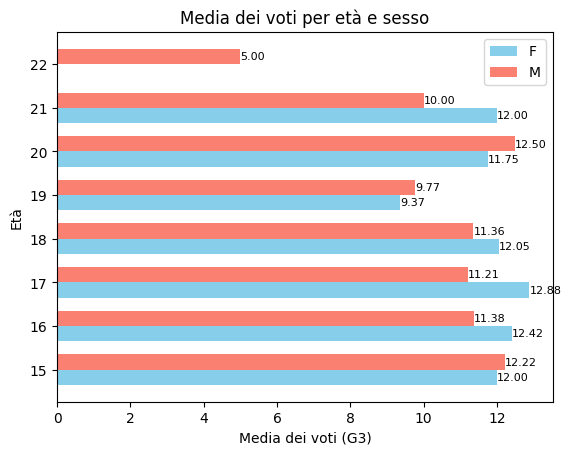

In [40]:
# Calcola la media dei voti dei figli per ciascuna combinazione di età e sesso
mean_scores = por.groupby(["age", "sex"])["G3"].mean().unstack()

# Imposta la larghezza delle barre e la posizione delle barre parallele
bar_height = 0.35
age_levels = mean_scores.index
index = np.arange(len(age_levels))

# Crea la figura e gli assi
fig, ax = plt.subplots()

# Crea le barre orizzontali per i sessi con colori specificati
bars_f = ax.barh(index, mean_scores['F'], bar_height, label='F', color='skyblue')
bars_m = ax.barh(index + bar_height, mean_scores['M'], bar_height, label='M', color='salmon')

# Aggiungi etichette e titolo
ax.set_ylabel("Età")
ax.set_xlabel('Media dei voti (G3)')
ax.set_title("Media dei voti per età e sesso")
ax.set_yticks(index + bar_height / 2)
ax.set_yticklabels(age_levels)
ax.legend()

# Aggiungi i valori accanto a ogni barra con font-size ridotto e colore nero per il testo
for bar in bars_f:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8, color='black')

for bar in bars_m:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8, color='black')

# Mostra il grafico
plt.show()


In [31]:
print("Grado di educazione medio dei padri: ", por.Fedu.mean())
print("Grado di educazione medio delle madri: ", por.Medu.mean())

Media del grado di educazione dei padri:  2.3066255778120186
Media del grado di educazione delle madri:  2.514637904468413


In [42]:
# Grafico che rappresenta l'andamento scolastico dei figli rispetto al livello d'istruzione dei genitori

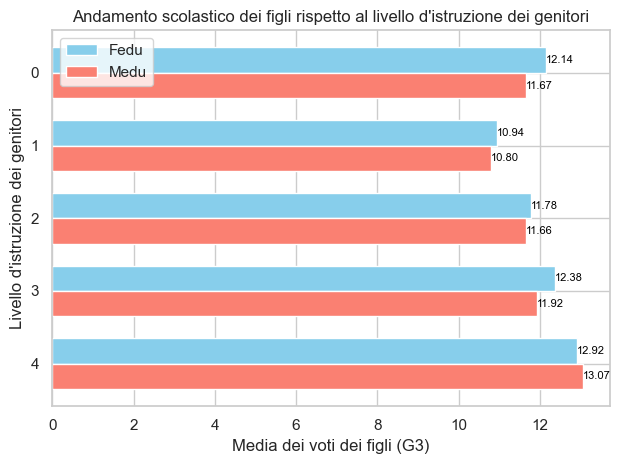

In [49]:
# Calcola la media dei voti dei figli per ciascun livello d'istruzione dei genitori
fedu_mean = por.groupby('Fedu')['G3'].mean()
medu_mean = por.groupby('Medu')['G3'].mean()

# Crea un array di valori unici per Fedu e Medu
education_levels = np.arange(5)

# Imposta l'altezza delle barre e la posizione delle barre parallele
bar_height = 0.35
index = np.arange(len(education_levels))

# Crea la figura e gli assi
fig, ax = plt.subplots()

# Colori per Fedu e Medu
color_fedu = 'skyblue'
color_medu = 'salmon'

# Crea le barre orizzontali per Fedu e Medu con colori specificati
bars1 = ax.barh(index, fedu_mean, bar_height, label='Fedu', color=color_fedu)
bars2 = ax.barh(index + bar_height, medu_mean, bar_height, label='Medu', color=color_medu)

# Aggiungi etichette e titolo
ax.set_ylabel("Livello d'istruzione dei genitori")
ax.set_xlabel('Media dei voti dei figli (G3)')
ax.set_title("Andamento scolastico dei figli rispetto al livello d'istruzione dei genitori")
ax.set_yticks(index + bar_height / 2)
ax.set_yticklabels(education_levels)
ax.invert_yaxis()  # Inverti l'asse y per avere il livello d'istruzione più alto in cima
ax.legend()

# Aggiungi i valori accanto a ogni barra con font-size ridotto e colore nero per il testo
for bar in bars1:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8, color='black')

for bar in bars2:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8, color='black')

# Mostra il grafico
plt.tight_layout()
plt.show()


### School analysis

In [ ]:
# Analisi degli istituti scolastici

# Analisi per reason: ragioni per la scelta della scuola

In [51]:
por.groupby(["school"])["G3"].describe()

,count,mean,std,min,25%,50%,75%,max
school,,,,,,,,
GP,423.0,12.576832,2.625636,0.0,11.0,13.0,14.0,19.0
MS,226.0,10.650442,3.833991,0.0,9.0,11.0,13.0,19.0


### Other analysis

In [ ]:
# Gestione del tempo

# Consumo Alcolici

# Uso di internet

# Previsioni del voto finale tramite algoritmi di machine learnig

In [61]:
por_enc.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,16.744222,0.696456,0.295840,0.876733,2.514638,2.306626,1.568567,1.930663,...,0.565485,0.278891,0.055470,0.439137,0.229584,0.11094,0.220339,0.235747,0.701079,0.063174
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,0.748660,0.829510,...,0.496075,0.448799,0.229072,0.496665,0.420890,0.31430,0.414795,0.424792,0.458138,0.243464
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Algoritmi adoperati:

1. Random Forest:
https://www.analyticsvidhya.com/blog/2021/10/an-introduction-to-random-forest-algorithm-for-beginners/

2. SVR

3. Neural Network Regressor

4. Gradient Boosting Regressor

5. KNN

6. Linear regression

In [62]:
# 1. Separazione delle feature e del target
X = por_enc.drop(columns=['G3'])
y = por_enc['G3']

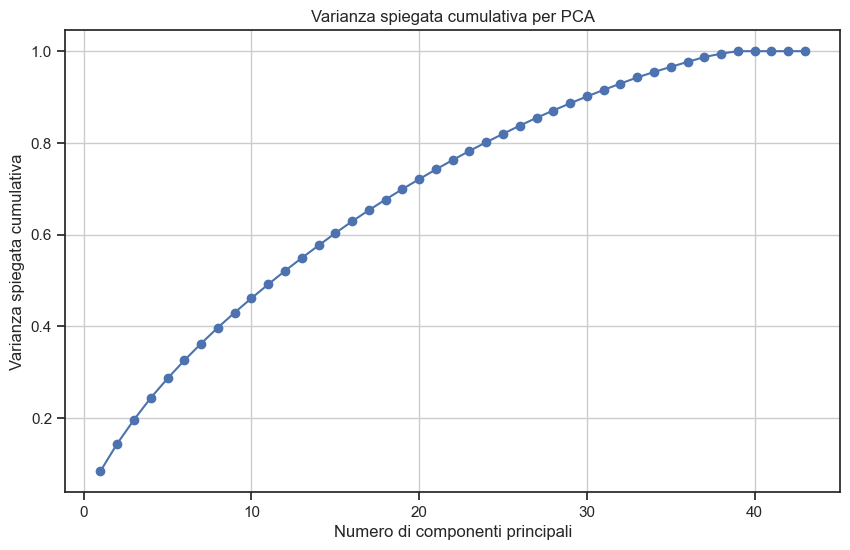

In [63]:
# 2. Riduzione della dimensionalità

'''
Normalization method: 

    https://medium.com/@mkc940/different-normalization-methods-a1be71fe9f1

    https://www.datacamp.com/tutorial/normalization-in-machine-learning

    https://www.geeksforgeeks.org/what-is-data-normalization/

DimensionalityReduction Techniques
    
    https://medium.com/nerd-for-tech/dimensionality-reduction-techniques-pca-lca-and-svd-f2a56b097f7c

    https://medium.com/machine-learning-researcher/dimensionality-reduction-pca-and-lda-6be91734f567

'''

# Normalizzazione dei dati
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X) 
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# PCA senza specificare il numero di componenti
pca = PCA()
pca.fit(X_scaled)

# Varianza spiegata cumulativa
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot della varianza spiegata cumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Numero di componenti principali')
plt.ylabel('Varianza spiegata cumulativa')
plt.title('Varianza spiegata cumulativa per PCA')
plt.grid(True)
plt.show()


In [65]:
# Scegliere il numero di componenti che spiegano almeno il 95% della varianza
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Numero di componenti principali per spiegare almeno il 95% della varianza: {num_components}")

# Riduzione della dimensionalità con il numero ottimale di componenti
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Salva i nomi delle colonne originali prima di applicare PCA
col_names = X.columns.tolist()

Numero di componenti principali per spiegare almeno il 95% della varianza: 34


In [66]:
# Estrazione dei coefficienti del PCA
pca_components = pca.components_

# Creazione di un dataframe per visualizzare l'importanza delle feature originali
original_feature_names = X.columns.tolist()

In [ ]:
# Confermando che le stesse feature che sono state tirate precedentemente
# come maggiormente correlate correlate dalla matrice di correlazione
# adesso sono state confermate anche PCA
# le stesse feature g3_correlations_abs.index.to_list()

In [81]:
feature_diff = [f for f in g3_correlations_abs.index.to_list() if f not in original_feature_names]

print(feature_diff)


['G3']


In [82]:
feature_importances = np.sum(np.abs(pca_components), axis=0)

# Creazione di un dataframe per visualizzare l'importanza delle feature originali
pca_importance_df = pd.DataFrame({'Feature': original_feature_names, 'Importance': feature_importances})

# Ordinamento delle feature per importanza
pca_importance_df = pca_importance_df.sort_values(by='Importance', ascending=False)


In [83]:
pca_importance_df

,Feature,Importance
5,Pstatus,4.786910
24,health,4.742870
13,paid,4.678547
9,studytime,4.645983
14,activities,4.613983
3,address,4.597777
17,internet,4.580810
19,famrel,4.561510
4,famsize,4.550934
12,famsup,4.533713


In [84]:
# 3. Divisione del dataset in training e test

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [112]:
# 4. Ottimizzazione dei parametri di ogni modello

'''
Supervised ML regression algorithms

    https://www.onlinemanipal.com/blogs/popular-regression-algorithms-in-machine-learning

    https://www.analyticsvidhya.com/blog/2021/05/5-regression-algorithms-you-should-know-introductory-guide/

    https://www.geeksforgeeks.org/regression-in-machine-learning/



Parameter optimization machine learning models

    https://www.linkedin.com/pulse/machine-learning-optimization-techniques-bilal-el-jamal/

    https://www.datacamp.com/tutorial/parameter-optimization-machine-learning-models
    
'''
'''
math explained 


Random forest:
    https://medium.com/capital-one-tech/random-forest-algorithm-for-machine-learning-c4b2c8cc9feb

Decision Tree:
    https://ankitnitjsr13.medium.com/math-behind-decision-tree-algorithm-2aa398561d6d

Gradient Boosting Regressor:
    https://medium.com/geekculture/gradient-boosting-for-regression-math-intuition-71f9a9826035#:~:text=Gradient%20Boosting%20starts%20by%20making,made%20by%20the%20previous%20tree.
SVM

Ridge Regression

KNN
'''

# Definizione delle distribuzioni dei parametri
param_dist_rf = {
    'n_estimators': randint(50, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

param_dist_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

param_dist_gb = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.7, 0.3)
}

param_dist_svr = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto'] + list(uniform(0.0001, 0.1).rvs(10)),
    'epsilon': uniform(0.1, 1.0)
}

param_dist_ridge = {
    'alpha': uniform(0.1, 10)
}

param_dist_knn = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


'''
param_dist_nn = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,), (100, 100), (100, 50, 25)],
    'activation': ['tanh', 'relu', 'logistic'],
    #'solver': ['sgd', 'adam', 'lbfgs'],
    'solver': ['sgd', 'adam'],
    'alpha': uniform(0.0001, 0.1),
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
    'max_iter': [5000, 6000, 7000],  # aumentare ulteriormente il numero massimo di iterazioni
    'early_stopping': [True, False]
}

param_dist_lr = {}  # Linear Regression non ha iperparametri da ottimizzare
'''

"\nparam_dist_nn = {\n    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,), (100, 100), (100, 50, 25)],\n    'activation': ['tanh', 'relu', 'logistic'],\n    #'solver': ['sgd', 'adam', 'lbfgs'],\n    'solver': ['sgd', 'adam'],\n    'alpha': uniform(0.0001, 0.1),\n    'learning_rate': ['constant', 'adaptive', 'invscaling'],\n    'max_iter': [5000, 6000, 7000],  # aumentare ulteriormente il numero massimo di iterazioni\n    'early_stopping': [True, False]\n}\n\nparam_dist_lr = {}  # Linear Regression non ha iperparametri da ottimizzare\n"

In [113]:
# Definizione dei modelli
models = {
    'RandomForest': (RandomForestRegressor(random_state=42), param_dist_rf),
    'DecisionTree': (DecisionTreeRegressor(random_state=42), param_dist_dt),
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), param_dist_gb),
    'SVR': (SVR(), param_dist_svr),
    #'NeuralNetwork': (MLPRegressor(max_iter=1000, random_state=42), param_dist_nn),
    #'LinearRegression': (LinearRegression(), param_dist_lr),
    'Ridge': (Ridge(), param_dist_ridge),
    'KNN': (KNeighborsRegressor(), param_dist_knn)
}

# 5. Addestramento di ogni modello ottimizzato
# RandomizedSearchCV per ogni modello
random_searches = {}
for model_name, (model, param_dist) in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)
    random_searches[model_name] = random_search
    print(f"Best parameters for {model_name}: {random_search.best_params_}")

# 6. Previsione e valutazione di ogni modello
# Previsione e valutazione dei modelli
results = {}
for model_name, search in random_searches.items():
    y_pred = search.best_estimator_.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = {'R^2': r2, 'MSE': mse}

# Creazione del DataFrame per i risultati
results_df = pd.DataFrame(results).T
print("Risultati delle previsioni:")
print(results_df)




Best parameters for RandomForest: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 7, 'n_estimators': 264}
Best parameters for DecisionTree: {'max_depth': None, 'min_samples_leaf': 14, 'min_samples_split': 19}
Best parameters for GradientBoosting: {'learning_rate': np.float64(0.02031655633456552), 'max_depth': 8, 'min_samples_leaf': 17, 'min_samples_split': 5, 'n_estimators': 99, 'subsample': np.float64(0.8987566853061946)}
Best parameters for SVR: {'C': np.float64(3.5388521115218396), 'epsilon': np.float64(1.009320402078782), 'gamma': np.float64(0.00790588851470625)}
Best parameters for Ridge: {'alpha': np.float64(9.799098521619943)}
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'}
Risultati delle previsioni:
                       R^2        MSE
RandomForest      0.162128   8.170694
DecisionTree     -0.438499  14.027838
GradientBoosting  0.155334   8.236947
SVR               0.217861   7.627195
Ridge         

In [109]:
# Inizializzare un dizionario per salvare i risultati
results = {}

# Loop attraverso ogni modello e calcolare le metriche
for model_name, search in random_searches.items():
    y_pred = search.best_estimator_.predict(X_test)
    
    # Calcolare le metriche
    # Calcolare le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # RMSE è la radice quadrata del MSE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Salvare le metriche nel dizionario
    results[model_name] = {'R^2': r2, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'MAE': mae}


# Stampa dei risultati per ogni modello
'''
for model_name, metrics in results.items():
    print(f"Risultati per {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print()  # Linea vuota per separare i risultati dei modelli
'''

'\nfor model_name, metrics in results.items():\n    print(f"Risultati per {model_name}:")\n    for metric_name, value in metrics.items():\n        print(f"{metric_name}: {value:.4f}")\n    print()  # Linea vuota per separare i risultati dei modelli\n'

In [110]:
results_df2 = pd.DataFrame(results).T
print(results_df2)

                       R^2        MSE      RMSE          MAPE       MAE
RandomForest      0.166770   8.125419  2.850512  7.092240e+14  2.089301
DecisionTree     -0.438499  14.027838  3.745376  6.978105e+14  2.912000
GradientBoosting  0.155334   8.236947  2.870008  7.081134e+14  2.116010
SVR               0.231271   7.496429  2.737961  7.289950e+14  1.990564
Ridge             0.187410   7.924148  2.814986  6.856860e+14  2.129239
KNN               0.126527   8.517862  2.918538  8.017397e+14  2.193040


In [106]:
results_df1 = pd.DataFrame(results).T
print(results_df1)

                       R^2        MSE      RMSE          MAPE       MAE
RandomForest      0.162128   8.170694  2.858443  7.176448e+14  2.095613
DecisionTree     -0.438499  14.027838  3.745376  6.978105e+14  2.912000
GradientBoosting  0.114797   8.632248  2.938069  6.657562e+14  2.179604
SVR               0.178324   8.012749  2.830680  7.718129e+14  2.048892
Ridge             0.187410   7.924148  2.814986  6.856860e+14  2.129239
KNN               0.126527   8.517862  2.918538  8.017397e+14  2.193040


<b>Considerazioni:</b>

Miglior Modello in Base a R²: Il modello Ridge ha il miglior R², quindi spiega meglio la variabilità dei dati rispetto agli altri modelli.

Modello con Meno Errori Assoluti: Il modello Ridge ha il MSE e il RMSE più bassi, indicando che commette meno errori assoluti rispetto agli altri modelli.

Modello con Meno Errori Percentuali: Il modello GradientBoosting ha il MAPE più basso, il che significa che ha errori percentuali più bassi rispetto agli altri modelli.

<b>Conclusione:</b>

Il modello Ridge sembra essere il migliore tra quelli elencati, poiché ha il miglior R² e commette meno errori assoluti (MSE e RMSE più bassi). Tuttavia, se l'errore percentuale è una metrica critica per il problema specifico (come nel caso di predizioni finanziarie o di business), potrebbe essere più appropriato considerare il modello GradientBoosting che ha il MAPE più basso.

In [ ]:
# 7. Visualizzazione dell'importanza delle feature

In [104]:
# Nome delle componenti principali
pca_feature_names = [f'PC{i+1}' for i in range(num_components)]

In [ ]:
def plot_feature_importances(model, feature_names, col_names, model_name):

    # RandomForest, DecisionTree, GradientBoosting
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    
    # SVR, Ridge, KNN
    else:
        if model_name == 'Ridge':
            importances = np.abs(model.coef_)
        else:
            importances = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
            importances = importances.importances_mean

    indices = np.argsort(importances)
    title = f"Feature Importances - {model_name}"

    plt.figure(figsize=(10, 8))
    bars = plt.barh(range(len(feature_names)), importances[indices], align="center")
    plt.yticks(range(len(feature_names)), [col_names[i] for i in indices], rotation=45, ha='right')
    plt.title(title)
    plt.ylabel('Feature')
    plt.xlabel('Importance')
    plt.tight_layout()  

    # Annotazione dei valori sulla destra delle barre
    for bar in bars:
        plt.annotate(f'{bar.get_width():.2f}', xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0), textcoords='offset points', ha='left', va='center')
    
    plt.show()  


In [ ]:
for model_name, model_info in models.items():
    plot_feature_importances(random_searches[model_name].best_estimator_, pca_feature_names, col_names, model_name)